<a href="https://colab.research.google.com/github/Divyascientist/Predictions/blob/main/Time_Series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

from prophet import Prophet
from statsmodels.tsa.stattools import acf,pacf_ols,adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
sales=pd.read_csv('Tractor-Sales.csv')
sales.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [ ]:
sales.columns=['Month_Year','No_Tractors_Sold']

In [ ]:
sales['Month_Year']=pd.to_datetime(sales['Month_Year'],format='%b-%y')

In [ ]:
sales.set_index(sales.Month_Year,inplace=True)

In [ ]:
sales.head()

,Month_Year,No_Tractors_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203


In [ ]:
ts=sales.No_Tractors_Sold

<Axes: xlabel='Month_Year'>

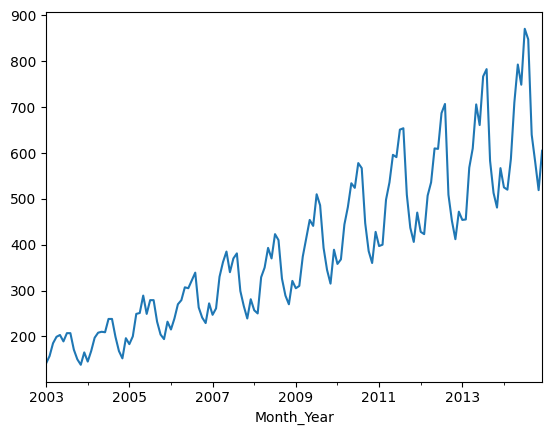

In [ ]:
ts.plot()

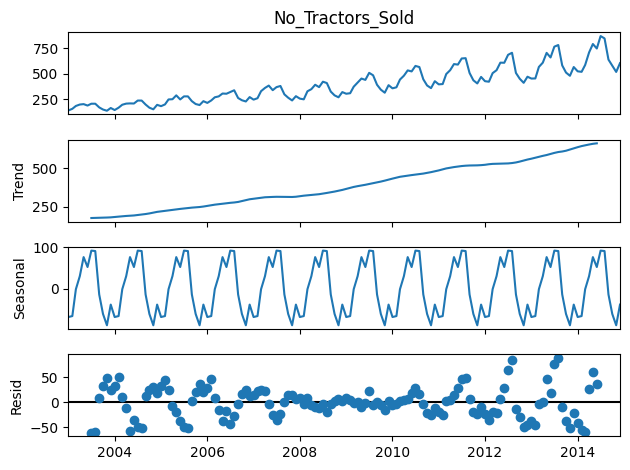

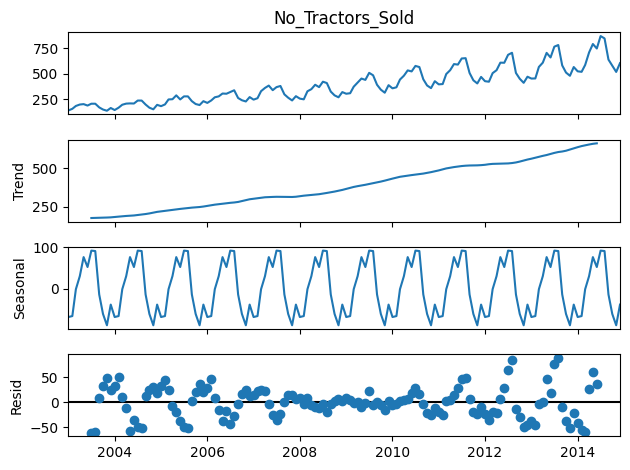

In [ ]:
decom=seasonal_decompose(ts,model='additive')
decom.plot()

In [ ]:
a=pd.concat([decom.observed,decom.trend,decom.seasonal,decom.resid],axis=1)
a.head(12)

,No_Tractors_Sold,trend,seasonal,resid
Month_Year,,,,
2003-01-01,141.0,NaN,-68.763889,NaN
2003-02-01,157.0,NaN,-66.434343,NaN
2003-03-01,185.0,NaN,-1.638889,NaN
2003-04-01,199.0,NaN,29.952020,NaN
2003-05-01,203.0,NaN,75.876263,NaN
2003-06-01,189.0,NaN,51.948232,NaN
2003-07-01,207.0,176.166667,91.584596,-60.751263
2003-08-01,207.0,176.791667,90.482323,-60.273990
2003-09-01,171.0,177.750000,-14.233586,7.483586


Using Prophet model to predict

In [ ]:
model=Prophet()

In [ ]:
sales

,Month_Year,No_Tractors_Sold
Month_Year,,
2003-01-01,2003-01-01,141
2003-02-01,2003-02-01,157
2003-03-01,2003-03-01,185
2003-04-01,2003-04-01,199
2003-05-01,2003-05-01,203
...,...,...
2014-08-01,2014-08-01,848
2014-09-01,2014-09-01,640
2014-10-01,2014-10-01,581


In [ ]:
df=sales[['Month_Year','No_Tractors_Sold']]
df.columns=['ds','y']

In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsa_xs0b/ehba191z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmsa_xs0b/apcbmluf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7608', 'data', 'file=/tmp/tmpmsa_xs0b/ehba191z.json', 'init=/tmp/tmpmsa_xs0b/apcbmluf.json', 'output', 'file=/tmp/tmpmsa_xs0b/prophet_model9yo4thzt/prophet_model-20250404152534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model

In [ ]:
df.tail(5)

,ds,y
Month_Year,,
2014-08-01,2014-08-01,848
2014-09-01,2014-09-01,640
2014-10-01,2014-10-01,581
2014-11-01,2014-11-01,519
2014-12-01,2014-12-01,605


In [ ]:
future=model.make_future_dataframe(periods=12,freq='M')

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
future.tail()

,ds
151,2015-07-31
152,2015-08-31
153,2015-09-30
154,2015-10-31
155,2015-11-30


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2015-07-31,795.824397,749.477788,842.650942
152,2015-08-31,696.825834,652.078212,740.455416
153,2015-09-30,656.546480,613.930424,702.554047
154,2015-10-31,631.821472,589.440787,677.628155
155,2015-11-30,678.967620,633.931825,725.110043


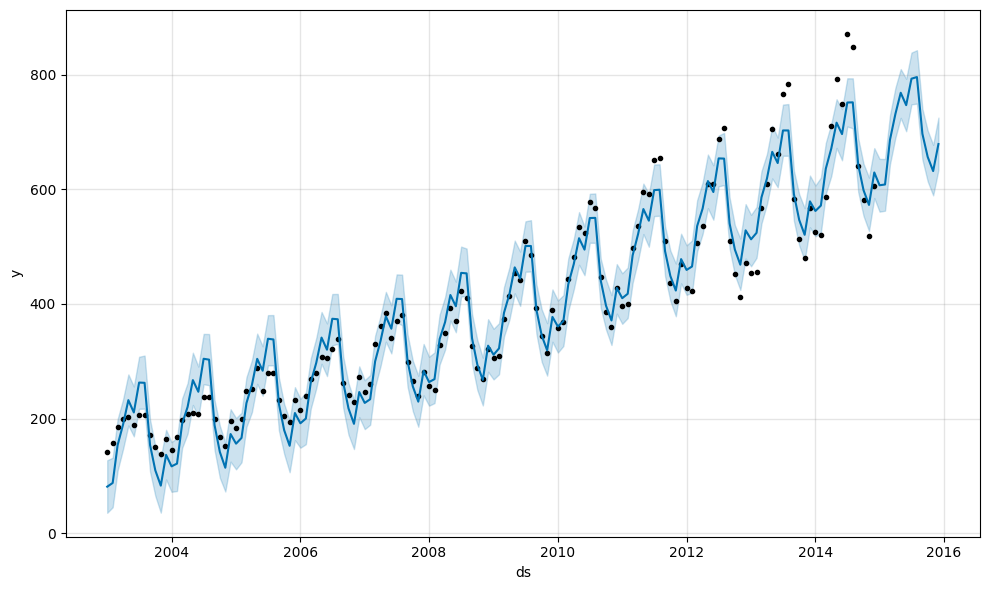

In [ ]:
fig1=model.plot(forecast)

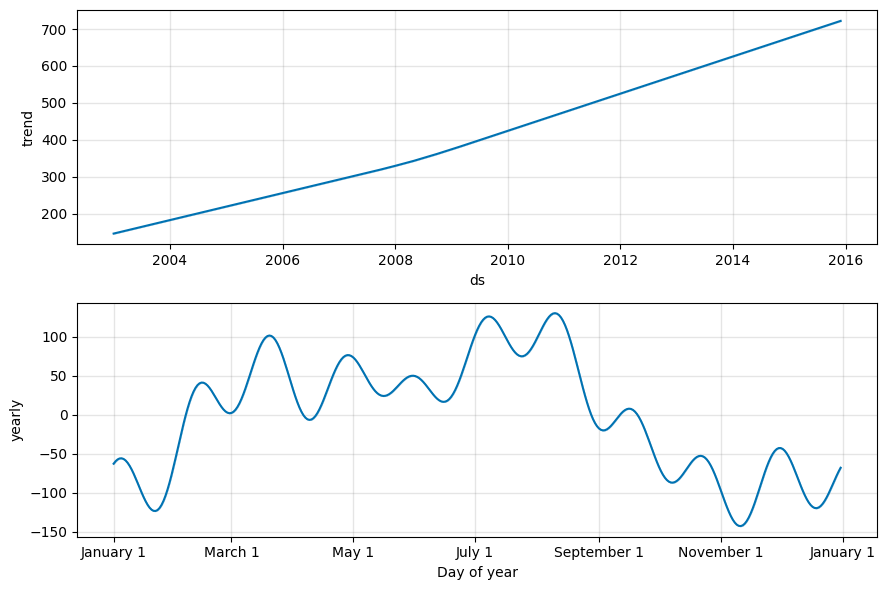

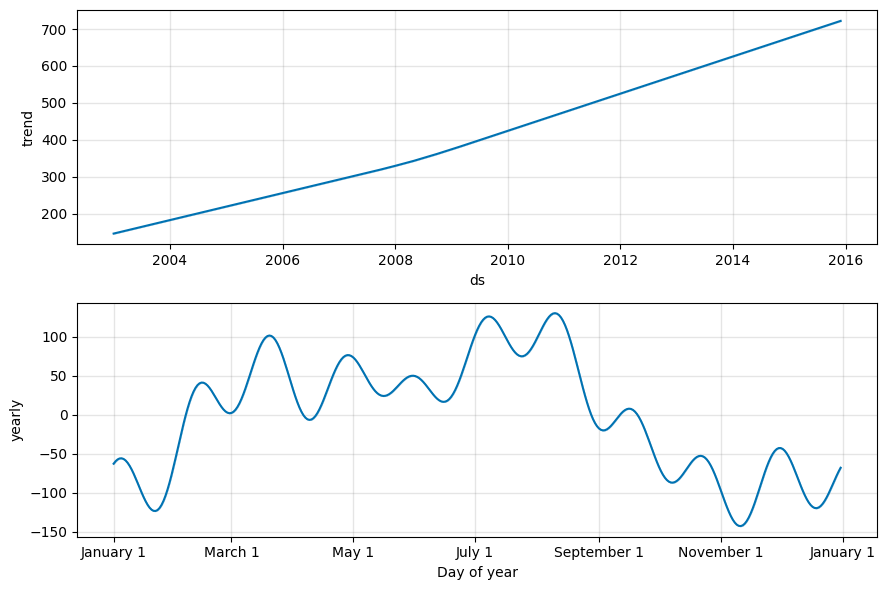

In [ ]:
model.plot_components(forecast)

Forecasting using Exponential Smooethening models

In [ ]:
acf(ts)

array([1.        , 0.93227225, 0.85202781, 0.77529517, 0.70383048,
       0.6278042 , 0.56094238, 0.57893406, 0.60681233, 0.63946606,
       0.6804663 , 0.73091127, 0.76575247, 0.70555818, 0.63460587,
       0.56558852, 0.50183519, 0.43173688, 0.36926281, 0.38242452,
       0.40550795, 0.43557653])

In [ ]:
pacf_ols(ts)

array([ 1.        ,  0.94282542, -0.19338079,  0.04385943,  0.01926126,
        0.01370998,  0.07475455,  0.84904005, -0.10249317,  0.41605171,
        0.47255786,  0.82978844,  0.50798646, -0.76132915, -0.21328399,
        0.17472598, -0.28103267,  0.08969196,  0.01505392,  0.12151827,
        0.09053338,  0.1730479 ])

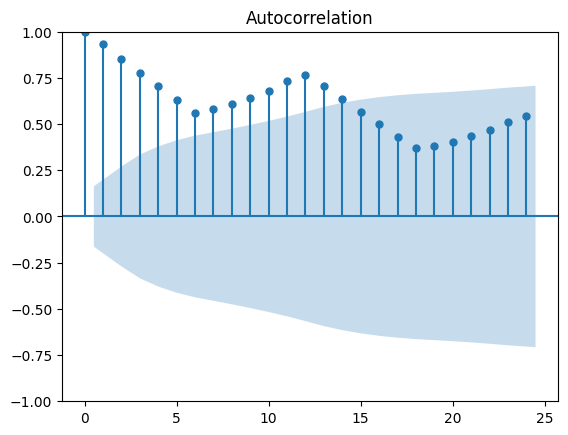

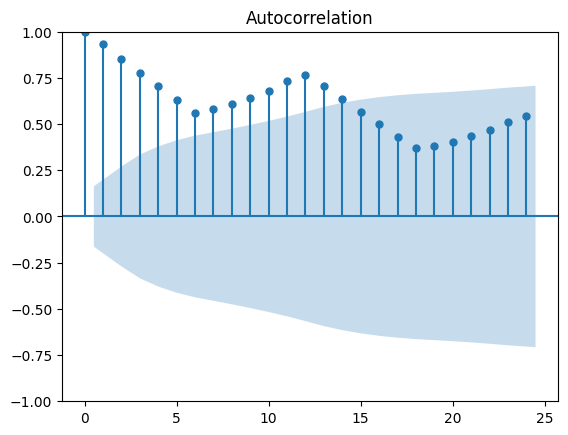

In [ ]:
smt.graphics.plot_acf(ts,lags=24)# you get seasonality period using acf plot to check distance between two peaks)

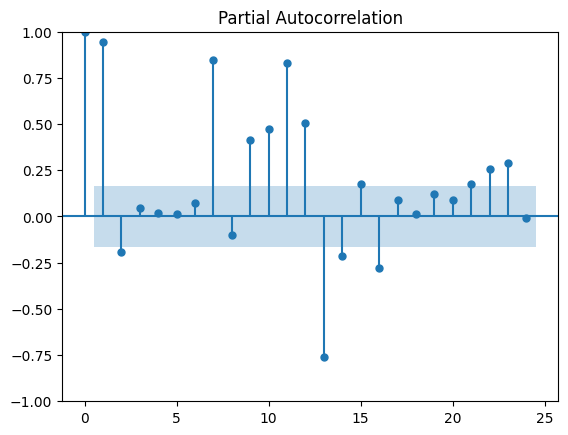

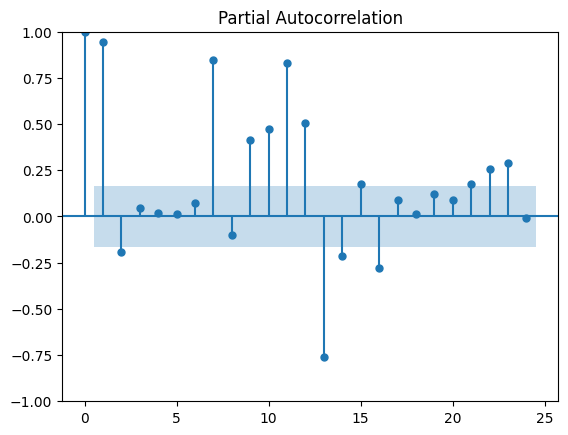

In [ ]:
smt.graphics.plot_pacf(ts,lags=24,method='ols')# to check till how many back x values have to be considered .We will consider values
#till the points are out of the shaded area)

In [ ]:
#Is the series stationary?

# Perform Dickey-Fuller test:
adfuller(ts)  #p-value: 0.9952   , since p-value is high, the series(ts) is not stationary

(np.float64(1.1088250591467337),
 np.float64(0.9952912415248419),
 14,
 129,
 {'1%': np.float64(-3.482087964046026),
  '5%': np.float64(-2.8842185101614626),
  '10%': np.float64(-2.578864381347275)},
 np.float64(1082.5357724796872))

In [ ]:
log_ts=np.log(ts)

In [ ]:
adfuller(log_ts) #p-value = 0.41446449274910446, since p-value is high, the series(ln_ts) is not stationary

(np.float64(-1.7324716814049672),
 np.float64(0.4144644927491065),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-446.8186692532702))

In [ ]:
ts_diff=ts.diff().dropna() # to remove trend from the series

In [ ]:
adfuller(ts_diff) #p-value=0.10525012618272955, since p-value is high, the series(ts_diff) is not stationary

(np.float64(-2.5434807731960407),
 np.float64(0.1052501261827305),
 14,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(1067.8217204928185))

In [ ]:
ts_ln_diff = np.log(ts).diff().dropna()

In [ ]:
adfuller(ts_ln_diff)   #p-value=0.07747972836509216, since p-value is high, the series(ts_ln_diff) is not stationary

(np.float64(-2.6804671199965804),
 np.float64(0.07747972836508807),
 14,
 128,
 {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 np.float64(-441.8932659968409))

In [ ]:
ts_ln_diff2 = np.log(ts).diff(2).dropna()

In [ ]:
adfuller(ts_ln_diff2)  #p-value=0.01994295010546119, since p-value<0.05, the series (ts_ln_diff2) is stationary series

(np.float64(-3.200721566232385),
 np.float64(0.01994295010546232),
 11,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(-434.9038941451596))

<Axes: xlabel='Month_Year'>

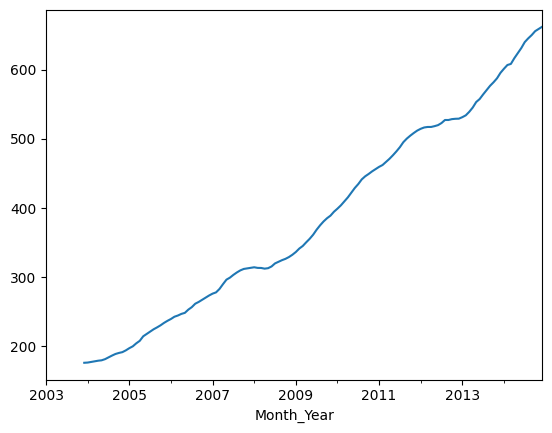

In [ ]:
ts.rolling(window=12).mean().plot() # to remove seasonality

<Axes: xlabel='Month_Year'>

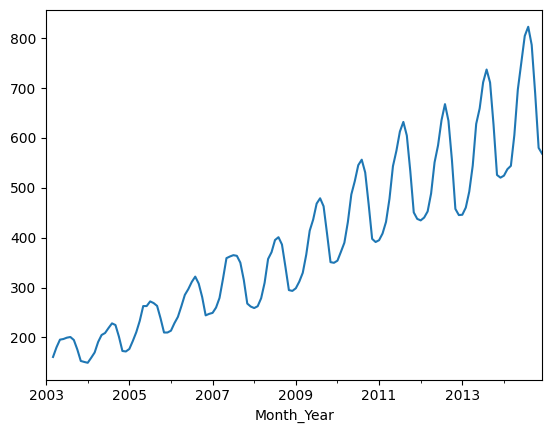

In [ ]:
ts.rolling(window=3).mean().plot()

In [ ]:
def auto_hwm(timeseries,val_split_date,alpha=[None],beta=[None],gamma=[None],
             trend=None,seasonal=None,periods=None,verbose=False):

  best_params=[]
  actual=timeseries[val_split_date:]

  for a in alpha:
    for b in beta:
      for g in gamma:

        if verbose==True:
          print(f'alpha={a},beta={b},gamma={g}')

        model=ExponentialSmoothing(timeseries,
                                   trend=trend,
                                   seasonal=seasonal,
                                   seasonal_periods=periods)
        model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
        pred=model.predict(model.params,start=actual.index[0])
        score = np.where(np.float64(mean_absolute_error(actual, pred)/actual).mean()>0,np.float64(mean_absolute_error(actual, pred)/actual).mean(),0)

        best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

  return min(best_params,key=lambda x: x['mae'])





In [ ]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [ ]:
auto_hwm(ts, val_split_date ='2014-07-01' , alpha=alpha, beta=beta, gamma=gamma,
              trend='mul', seasonal='mul', periods=12, verbose=True)

alpha=0.1,beta=0.1,gamma=0.1
alpha=0.1,beta=0.1,gamma=0.2
alpha=0.1,beta=0.1,gamma=0.3
alpha=0.1,beta=0.1,gamma=0.4


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.1,gamma=0.5
alpha=0.1,beta=0.1,gamma=0.6
alpha=0.1,beta=0.1,gamma=0.7
alpha=0.1,beta=0.1,gamma=0.8
alpha=0.1,beta=0.1,gamma=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.2,gamma=0.1
alpha=0.1,beta=0.2,gamma=0.2
alpha=0.1,beta=0.2,gamma=0.3
alpha=0.1,beta=0.2,gamma=0.4


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.2,gamma=0.5
alpha=0.1,beta=0.2,gamma=0.6
alpha=0.1,beta=0.2,gamma=0.7
alpha=0.1,beta=0.2,gamma=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.2,gamma=0.9
alpha=0.1,beta=0.3,gamma=0.1
alpha=0.1,beta=0.3,gamma=0.2
alpha=0.1,beta=0.3,gamma=0.3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.3,gamma=0.4
alpha=0.1,beta=0.3,gamma=0.5
alpha=0.1,beta=0.3,gamma=0.6
alpha=0.1,beta=0.3,gamma=0.7
alpha=0.1,beta=0.3,gamma=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.3,gamma=0.9
alpha=0.1,beta=0.4,gamma=0.1
alpha=0.1,beta=0.4,gamma=0.2
alpha=0.1,beta=0.4,gamma=0.3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.4,gamma=0.4
alpha=0.1,beta=0.4,gamma=0.5
alpha=0.1,beta=0.4,gamma=0.6
alpha=0.1,beta=0.4,gamma=0.7


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.4,gamma=0.8
alpha=0.1,beta=0.4,gamma=0.9
alpha=0.1,beta=0.5,gamma=0.1
alpha=0.1,beta=0.5,gamma=0.2
alpha=0.1,beta=0.5,gamma=0.3


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use

alpha=0.1,beta=0.5,gamma=0.4
alpha=0.1,beta=0.5,gamma=0.5
alpha=0.1,beta=0.5,gamma=0.6
alpha=0.1,beta=0.5,gamma=0.7


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.5,gamma=0.8
alpha=0.1,beta=0.5,gamma=0.9
alpha=0.1,beta=0.6,gamma=0.1
alpha=0.1,beta=0.6,gamma=0.2


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.6,gamma=0.3
alpha=0.1,beta=0.6,gamma=0.4
alpha=0.1,beta=0.6,gamma=0.5
alpha=0.1,beta=0.6,gamma=0.6


<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency

alpha=0.1,beta=0.6,gamma=0.7
alpha=0.1,beta=0.6,gamma=0.8
alpha=0.1,beta=0.6,gamma=0.9
alpha=0.1,beta=0.7,gamma=0.1
alpha=0.1,beta=0.7,gamma=0.2
alpha=0.1,beta=0.7,gamma=0.3
alpha=0.1,beta=0.7,gamma=0.4


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.7,gamma=0.5
alpha=0.1,beta=0.7,gamma=0.6
alpha=0.1,beta=0.7,gamma=0.7
alpha=0.1,beta=0.7,gamma=0.8
alpha=0.1,beta=0.7,gamma=0.9
alpha=0.1,beta=0.8,gamma=0.1


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.8,gamma=0.2
alpha=0.1,beta=0.8,gamma=0.3
alpha=0.1,beta=0.8,gamma=0.4
alpha=0.1,beta=0.8,gamma=0.5
alpha=0.1,beta=0.8,gamma=0.6
alpha=0.1,beta=0.8,gamma=0.7
alpha=0.1,beta=0.8,gamma=0.8
alpha=0.1,beta=0.8,gamma=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.9,gamma=0.1
alpha=0.1,beta=0.9,gamma=0.2
alpha=0.1,beta=0.9,gamma=0.3
alpha=0.1,beta=0.9,gamma=0.4
alpha=0.1,beta=0.9,gamma=0.5
alpha=0.1,beta=0.9,gamma=0.6


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

alpha=0.1,beta=0.9,gamma=0.7
alpha=0.1,beta=0.9,gamma=0.8
alpha=0.1,beta=0.9,gamma=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-53-f17e9a9d8f53>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
/usr/local/lib/python3.11/dist-packages/statsmodels

{'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2, 'mae': array(0.01287062)}

In [ ]:
ets_model=ExponentialSmoothing(ts,
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-56-d7b4a0761fb9>:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  seasonal_periods=12).fit(smoothing_level=0.1,smoothing_slope=0.6,smoothing_seasonal=0.2)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:         No_Tractors_Sold   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          62690.793
Optimized:                         True   AIC                            906.967
Trend:                   Multiplicative   BIC                            954.484
Seasonal:                Multiplicative   AICC                           912.439
Seasonal Periods:                    12   Date:                 Fri, 04 Apr 2025
Box-Cox:                          False   Time:                         19:01:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [ ]:
ets_model.forecast(24)

,0
2015-01-01,560.654284
2015-02-01,566.092561
2015-03-01,682.239549
2015-04-01,750.246714
2015-05-01,838.124955
2015-06-01,800.133664
2015-07-01,903.656153
2015-08-01,896.283403
2015-09-01,680.452154
2015-10-01,598.145837


In [ ]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None

    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))

                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results

            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results